## xcengine example input: a simple dynamic notebook

This notebook creates two simple synthetic datasets which are generated on the fly by xcube. It can be converted to an Application Package or compute engine container using `xcetool`.

### Parameters cell

The cell below has been given a tag `parameters`, so `xcetool` can recognize that it is used to define parameters for the rest of the notebook. Any variable values set in the parameters cell can be overridden using environment variables when the container is run. Here we define a single parameter, `periods`, which controls the number of time steps in the generated datasets.

In [1]:
periods = 10

xcengine_config = dict(
    workflow_id="dynamic",
    environment_file="environment.yml",
    container_image_tag="dynamic:1",
)

### Create our datasets

Now we create the output datasets. These datasets will be generated dynamically by the compute engine container as and when the data are need for display or writing. Unlike parameter variables, they don't have to be marked specifically: any variable with the data type `xarray.DataSet` which is in scope at the end of the notebook will be recognized automatically as an output dataset.

First, import the `xcube.core.new` function to help us create our synthetic datasets.

In [2]:
import xcube.core.new

Create a dataset with a single variable generated by a simple function designed to produce a pretty pattern.

In [3]:
cube1 = xcube.core.new.new_cube(
    variables={"v": lambda x, y, t: ((x + y + t) % 10) / 9},
    time_periods=periods
)
cube1.attrs["title"] = "Cube 1"

Create another, similar dataset with slightly different parameters for the function. For this dataset, we deliberately remove the `title` attribute to demonstrate how `xcetool` automatically generates a title from the variable name.

In [4]:
cube2 = xcube.core.new.new_cube(
    variables={"v": lambda x, y, t: ((x - y + t) % 20) / 19},
    time_periods=periods
)
cube2.attrs.pop("title", None)

'Test Cube'

### Plot one of the datasets

Just to check on the data, plot a time-slice from the first dataset. This plot will make no difference to the functionality of the container image and application package generated by `xcetool` from the notebook.

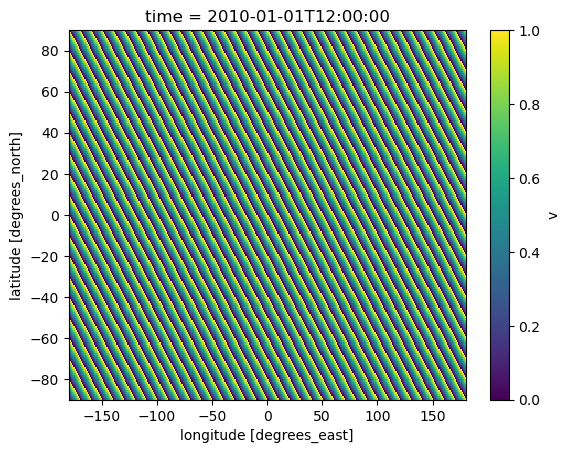

In [5]:
cube1.isel(time=0).v.plot.imshow()

### We’re done!

No extra code is needed to export the datasets – the xcengine code will find them automatically and handle them appropriately.